In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [352]:
Content = pd.read_csv('Content.csv')
Reactions = pd.read_csv('Reactions.csv')
ReactionType = pd.read_csv('ReactionTypes.csv')

### Data Cleaning

#### cleaning the Content dataset

In [442]:
Content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   Content ID    1000 non-null   object
 2   Content_type  1000 non-null   object
 3   Category      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [355]:
# droping unecessary columns
Content.drop(columns = ['URL','User ID'],inplace = True)

In [356]:
# checking null values
Content.isnull().sum()

Unnamed: 0    0
Content ID    0
Type          0
Category      0
dtype: int64

In [357]:
#cleaning the Category column
Content['Category'].unique().shape

(41,)

In [358]:
Content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [359]:
# removign inconsistent data in Category column
Content['Category']= Content['Category'].str.replace('"','')

In [360]:
# coverting to lower case to make data consistent
Content['Category']= Content['Category'].str.lower()

In [361]:
# rename column type to content_type
Content = Content.rename(columns={'Type': 'Content_type'})

#### cleaning Reaction dataset

In [445]:
Reactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     24573 non-null  int64         
 1   Content ID     24573 non-null  object        
 2   User ID        22534 non-null  object        
 3   Reaction Type  24573 non-null  object        
 4   Datetime       24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.1+ MB


In [363]:
Reactions.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [364]:
#deleting null values in column Type
Reactions= Reactions.dropna(subset=['Type'])

In [365]:
Reactions.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       2039
Type             0
Datetime         0
dtype: int64

In [366]:
# droping unnecessary columns
Reactions.drop(columns = ['User ID'])

,Unnamed: 0,Content ID,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


In [367]:
# renaming column type to reacion_type
Reactions = Reactions.rename(columns = {'Type':'Reaction Type'})

In [368]:
# changing datatype of datatime
Reactions['Datetime'] = pd.to_datetime(Reactions['Datetime'])

In [369]:
Reactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     24573 non-null  int64         
 1   Content ID     24573 non-null  object        
 2   User ID        22534 non-null  object        
 3   Reaction Type  24573 non-null  object        
 4   Datetime       24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.1+ MB


In [370]:
Reactions.shape

(24573, 5)

#### Cleaning ReactionType dataset

In [448]:
ReactionType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     16 non-null     int64 
 1   Reaction Type  16 non-null     object
 2   Sentiment      16 non-null     object
 3   Score          16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


In [372]:
ReactionType = ReactionType.rename(columns = {'Type':'Reaction Type'})

### Data Modelling
#### Creating a final data set by merging the three tables together

In [374]:
Merge1=Reactions.merge(Content, how = 'inner', on = 'Content ID')
Cleaned_dataset = Merge1.merge(ReactionType, how = 'inner', on = 'Reaction Type')
Cleaned_dataset = Cleaned_dataset.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'])
Cleaned_dataset

,Content ID,User ID,Reaction Type,Datetime,Content_type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,photo,studying,positive,30
...,...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48,audio,technology,negative,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02,audio,technology,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58,audio,technology,positive,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31,audio,technology,negative,12


### Data analysis
* The brief carefully it states that the client wanted to see “An analysis of their content categories showing the top 5 categories with the largest popularity”re.re.

#### What are the Top 5 Categories?

In [377]:
top_5_categories = Cleaned_dataset.groupby('Category')['Score'].sum().sort_values(ascending = False).head(5).reset_index()

In [378]:
top_5_categories

,Category,Score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


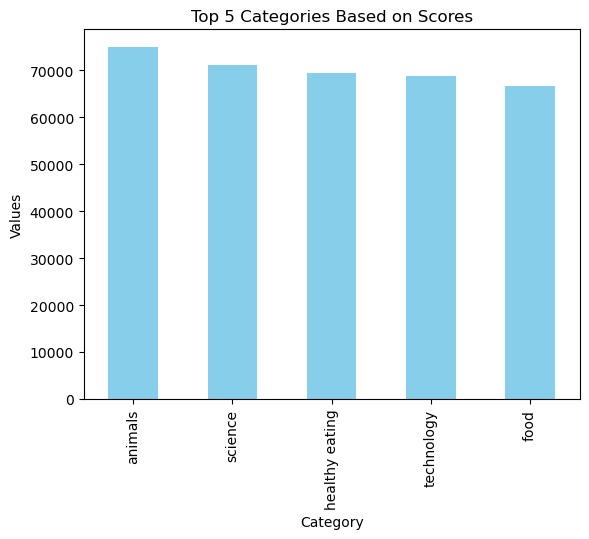

In [380]:
top_5_categories.plot(kind = 'bar',x = 'Category', y = 'Score',legend = False, color = 'skyblue')
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Top 5 Categories Based on Scores')
plt.savefig('top_5_categories.png',bbox_inches='tight', pad_inches=0.1)
plt.show()

#### Popularity share within the top 5 categories

In [382]:
top_5_categories.set_index('Category',inplace=True)

Text(0, 0.5, '')

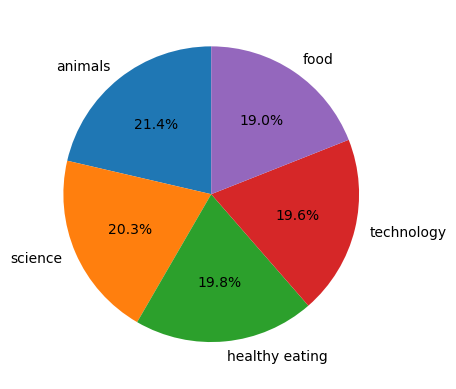

In [430]:
top_5_categories.plot(kind = 'pie',y='Score',autopct='%1.1f%%',startangle=90,legend = False)
plt.ylabel('')


### How many unique Content Categories are there?

In [385]:
Content['Category'].unique().shape

(16,)

#### There are 16 unique Categories
##### Some of which include Animals, cooking, food etc

### What was the month with the most posts?

In [388]:
Cleaned_dataset['month'] = Cleaned_dataset['Datetime'].dt.month_name()

month_order = pd.CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Convert month to categorical with the correct order
Cleaned_dataset['month'] = Cleaned_dataset['month'].astype(month_order)

# Group by month and sum the values
monthly_group = Cleaned_dataset.groupby('month',observed=True)['Content ID'].count()
monthly_group 

month
January      2126
February     1914
March        2012
April        1974
May          2138
June         2021
July         2070
August       2114
September    2022
October      2056
November     2034
December     2092
Name: Content ID, dtype: int64

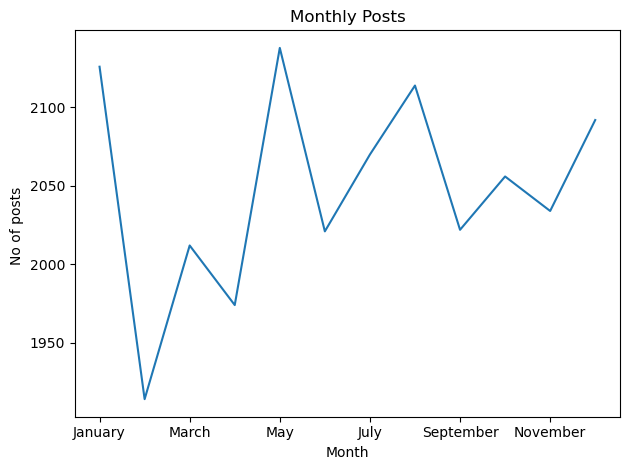

In [433]:
# plt.figure(figsize=(10, 6))
monthly_group.plot(kind = 'line', x= 'month' , y = 'Content ID', legend=False)

# plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('No of posts ')
plt.title('Monthly Posts')

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels

plt.savefig('Monthly_posts.png',bbox_inches='tight', pad_inches=0.1)
plt.show()

#### Month of May had the most no of posts, followed by Jan and Aug.
#### Least no of posts were seen in Feb

### How many reactions did the top Category get?

In [392]:
Cleaned_dataset.groupby('Category')['Reaction Type'].count().sort_values(ascending = False).head(1)

Category
animals    1897
Name: Reaction Type, dtype: int64

#### 1897 reactions for the Animals Category

### Summary
#### Animals and Science are the 2 most popular content, showing that people enjoy 'real-life' and 'factual' content the most.

### Insigts and recommendations

#### Food is a common theme with the top 5 categories with "Healthy Eating" ranking the highest. This may give an indicatlon to the audience within your user base. You could use this insight to create a campaign and work with healthy eating brands to boost user engagement.